In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import argparse

In [83]:
# parser = argparse.ArgumentParser(description='Input no. of neurons in layer 1 & 2')
# parser.add_argument('no. of neurons in Layer 1', type=int, help='no. of neurons in layer 1')
# parser.add_argument('no. of neurons in Layer 2', type=int, help='no. of neurons in layer 2')
# args = parser.parse_args()

n=np.random.randn(3,3)
o = np.random.randn(3,4)
np.dot(n,o)

array([[-0.59154619,  0.20506115,  1.61962805,  1.85242076],
       [-0.67791305, -0.48978792, -1.6597463 ,  0.82473587],
       [ 0.33107502,  0.03566536, -1.33954336, -0.78316175]])

In [84]:
digits = sklearn.datasets.load_digits(n_class=10, return_X_y=True)
X,Y = digits
sd=np.std(X)
X = (X*sd)/255
# Y = np.array(Y.reshape((1,1797)))
y = np.zeros((10,1797))
for i in range(1,Y.shape[0]):
    a = Y[i]
    y[a,i] = 1

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y.T)
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

In [86]:
def sigmoid(x):
    sig = 1/(1+np.exp(-x))
    return sig

In [87]:
def init_weights(x,y):
    nx = x.shape[0]
    n1 = 64
    n2 = y.shape[0]
    w1 = np.random.rand(n1,nx) * 0.01
    b1 = 0                #np.random.randn(n1,1)
    w2 = np.random.rand(n2,n1)*0.01
    b2= 0                 #np.random.randn(n2,1)
    return w1,b1,w2,b2

In [88]:
def loss_fun(A2,y):
    m = y.shape[1]
    logprobs = np.multiply(np.log(A2),y) + np.multiply(np.log(1-A2),(1-y))
    cost = (-1/m)*np.sum(logprobs)
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    return cost

In [89]:
def forward_propogate(x,y,w1,b1,w2,b2):
    
    m = y.shape[1]
    #     Forward Propogation
    
    Z1 = np.matmul(w1,x) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(w2,A1) + b2
    A2 = sigmoid(Z2)
    
    return Z1,A1,Z2,A2
        

In [90]:
def back_propogate(w1,w2,Z1,A1,Z2,A2,x,y):
    m = y.shape[1]
    cost = loss_fun(A2,y)
    dZ2 = A2 - y
    dw2 = np.matmul(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1,keepdims = True)/m
    dZ1 = np.matmul(w2.T,dZ2) * (A1*(1-A1))
    dw1 = np.matmul(dZ1,x.T)/m
    db1 = np.sum(dZ1, axis=1,keepdims = True)/m
    
    return dw1,db1,dw2,db2,cost 


In [91]:
def optimize(x,y,w1,b1,w2,b2,iters=100,learning_rate=0.5):
    loss = []
    idx = []
    for i in range(iters):
        z1,a1,z2,a2 = forward_propogate(x,y,w1,b1,w2,b2)
        dw1,db1,dw2,db2,cost = back_propogate(w1,w2,z1,a1,z2,a2,x,y)
        
        if (i % 100 == 0):
            loss.append(cost)
            idx.append(i)
            
            
        w1 = w1 - (learning_rate*dw1)
        w2 = w2 - (learning_rate*dw2)
        b1 = b1 - (learning_rate*db1)
        b2 = b2 - (learning_rate*db2)
   
    return w1,b1,w2,b2,loss,idx
    

In [92]:
def predict(w1,b1,w2,b2,x,y):
    z1,a1,z2,a2 = forward_propogate(x,y,w1,b1,w2,b2)
    predictions = (a2>0.5)
    return predictions

In [99]:
def Accuracy(y,prediction):
    t = (prediction==y)
    accuracy = np.mean(t)*100
    return t,accuracy

In [94]:
w1,b1,w2,b2 = init_weights(X_train,Y_train)
print(w1.shape)
print(w2.shape)
print(X_train.shape)
W1,B1,W2,B2,loss,index = optimize(X_train,Y_train, w1, b1, w2, b2, 1000,1)

(64, 64)
(10, 64)
(64, 1347)


In [98]:
# print ('Accuracy: %d' % float(np.sum((np.dot(Y_test,predictions.T),axis=1,keepdims=True) + np.sum(np.dot(1-Y_test,1-predictions.T)),axis=1,keepdims=True)/float(Y_test.size)*100) + '%')
test = X[648]
test=test.reshape((64,1))
Z1 = np.dot(W1,test) + B1
A1 = sigmoid(Z1)
Z2 = np.dot(W2,A1) + B2
x2 = sigmoid(Z2)
# print(Z2)
op = np.argmax(x2)
print(sigmoid(Z2))
print(op)
print(Y[648])
x2.shape
# predictions=predict(W1,B1,W2,B2,X_test,Y_test)
# print ('Accuracy: %d' % float(np.sum((np.dot(Y_test,predictions.T),axis=1,keepdims=True) + np.sum(np.dot(1-Y_test,1-predictions.T)),axis=1,keepdims=True)/float(Y_test.size)*100) + '%')
# (np.sum((np.matmul(Y_test,predictions.T),axis=1,keepdims=True) +
#              np.sum(np.matmul(1-Y_test,1-predictions.T)),axis=1,keepdims=True)/float(Y_test.size)*100)
# Y[999]
# test = X[999]
# _,yp = predict(W1,B1,W2,B2,test)
# # print(yp.shape)
# # a = max(yp)
# # print(a)
# # print(np.where(yp==a))
# print(_)
# print(Y[999])
# print(yp)

[[2.97831291e-05]
 [3.56173757e-04]
 [9.59623401e-01]
 [1.98195364e-01]
 [6.10477442e-09]
 [4.57847397e-03]
 [3.42410856e-04]
 [4.58941748e-05]
 [3.27444868e-02]
 [6.07165833e-05]]
2
2


(10, 1)

In [96]:
# plt.imshow(X[457].reshape(8,8), cmap = plt.cm.binary)
loss

[7.651605551816209,
 3.2471929495081775,
 3.1929550515197627,
 2.429406795021765,
 1.7232965279287549,
 1.3218488643561135,
 1.0371149762615977,
 0.8363545091027759,
 0.6762571940536015,
 0.5653000061665752]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

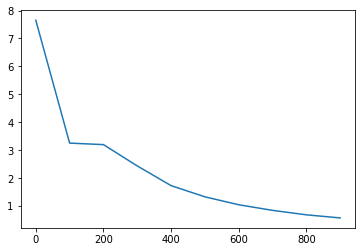

In [102]:
s=predict(W1,B1,W2,B2,X_test,Y_test)
orig = np.sum(Y_test)
# s = np.sum(s)
true = (s==Y_test)
plt.plot(index,loss)
t,b=Accuracy(Y_test,s)
t
# print('The accuracy is:%d'%float(Accuracy(Y_test,s)) + '%')